## BO and Random Search cumulative median test

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def random_search(data,nsteps,nrepeats):
    '''Performs nsteps cumulative random samples on data nrepeats times.
    Returns a nsteps X nrepeats array with the highest sampled so far on each run.'''
    
    sample=np.zeros((nrepeats,nsteps),dtype=float)
    for i in range(nrepeats):
        np.random.seed(i)
        rand_pos=np.arange(len(data))
        np.random.shuffle(rand_pos)
        for j in range(nsteps):
            draw=data[rand_pos[j]]
            if j==0 or draw>sample[i,j-1]:
                sample[i,j]=draw
            else:
                sample[i,j]=sample[i,j-1]
                
    return sample

def random_plot(path):
    data_random=np.genfromtxt(path, delimiter=",", skip_header=1)[:,-1]
    random_search_data=random_search(data_random,80,40)
    random_search_median=np.median(random_search_data,axis=0)
    random_search_errbars=np.stack([random_search_median-np.percentile(random_search_data,25,axis=0),
                                    np.percentile(random_search_data,75,axis=0)-random_search_median],axis=0)

    plt.errorbar(np.arange(1,random_search_data.shape[1]+1),random_search_median,yerr=random_search_errbars)
    plt.title("random search")
    plt.xlabel("random search epoch")
    plt.ylabel("cumulative median yield%")
    plt.show()
    try:
        print('Random search reaches maximum yield, 61, at epoch',random_search_median.tolist().index(61))
    except ValueError:
        print('Random search did not reach the maximum yield, 61')
        try:
            print('Random search reached 2nd maximum yield, 60, at epoch',random_search_median.tolist().index(60))
        except ValueError:
            print('Random search did not reach the 2nd maximum yield, 60')
    
def cumu_plotting(final_list): 
    cumu_results=[np.maximum.accumulate(i) for i in final_list]
    bayesopt_median_cumu=np.median(cumu_results,axis=0)
    bayesopt_errbars_cumu=np.stack([bayesopt_median_cumu-np.percentile(cumu_results,25,axis=0),np.percentile(cumu_results,75,axis=0)-bayesopt_median_cumu],axis=0)
    plt.errorbar(np.arange(1,len(cumu_results[0])+1),bayesopt_median_cumu,yerr=bayesopt_errbars_cumu)
    plt.ylabel('cumulative median yield%')
    plt.xlabel('BO epoch')
    plt.show()
    try:
        print('BO reaches maximum yield, 61, at epoch',bayesopt_median_cumu.tolist().index(61))
    except ValueError:
        print('BO did not reach the maximum yield, 61')
        try:
            print('BO reached 2nd maximum yield, 60, at epoch',bayesopt_median_cumu.tolist().index(60))
        except ValueError:
            print('BO did not reach the 2nd maximum yield, 60')

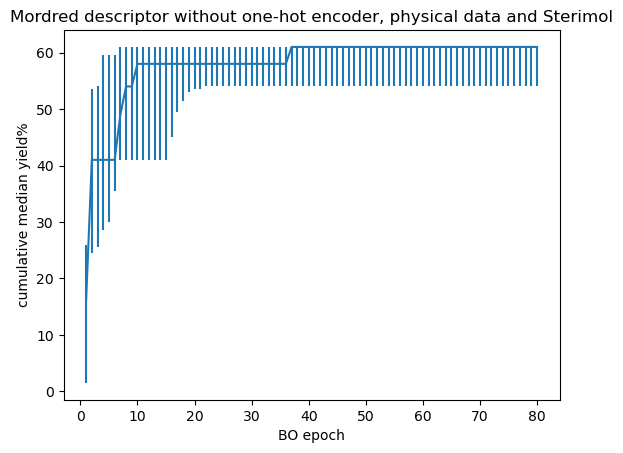

BO reaches maximum yield, 61, at epoch 36


In [3]:
list_final1=pd.read_csv('raw 40 x 80_mordred_no_onehot_no_sterimol.csv').to_numpy().tolist()
plt.title("Mordred descriptor without one-hot encoder, physical data and Sterimol")
cumu_plotting(list_final1)

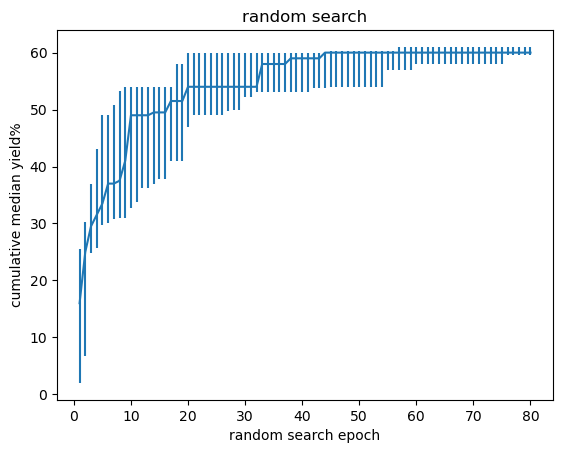

Random search did not reach the maximum yield, 61
Random search reached 2nd maximum yield, 60, at epoch 43


In [4]:
random_plot("experiment_list_sterimol_final.csv")

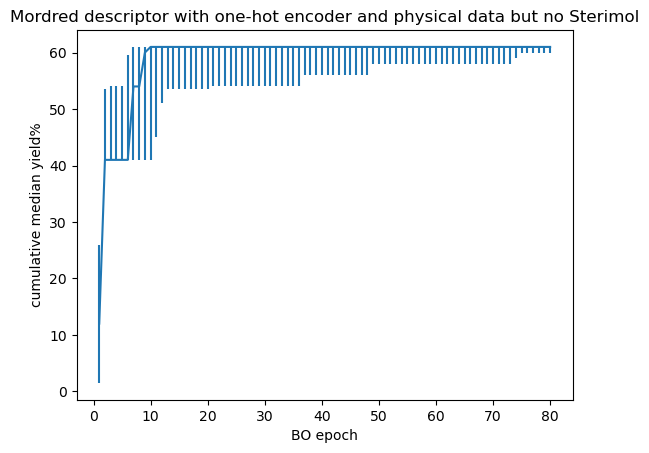

BO reaches maximum yield, 61, at epoch 9


In [5]:
list_final2=pd.read_csv('raw 40 x 80_modred_onehot_no_sterimol_no10and33.csv').to_numpy().tolist()
plt.title("Mordred descriptor with one-hot encoder and physical data but no Sterimol")
cumu_plotting(list_final2)

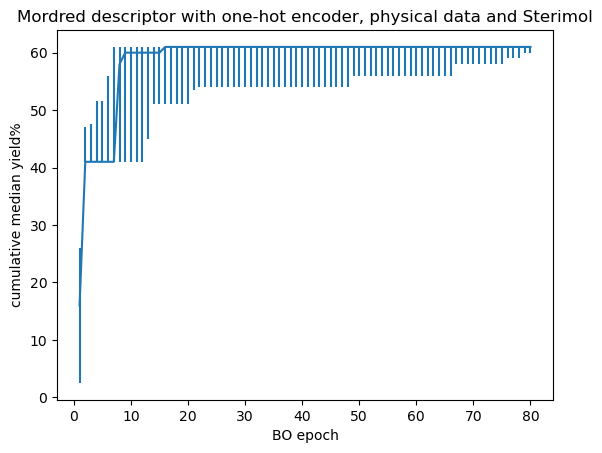

BO reaches maximum yield, 61, at epoch 15


In [6]:
list_final3=pd.read_csv('raw 40 x 80_mordred_onehot_physidata_sterimol.csv').to_numpy().tolist()
plt.title("Mordred descriptor with one-hot encoder, physical data and Sterimol")
cumu_plotting(list_final3)

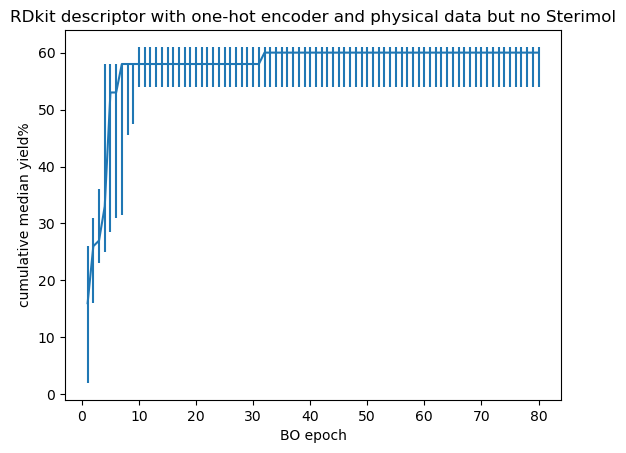

BO did not reach the maximum yield, 61
BO reached 2nd maximum yield, 60, at epoch 31


In [7]:
list_final4=pd.read_csv('raw 40 x 80_rdkit_onehot.csv').to_numpy().tolist()
plt.title("RDkit descriptor with one-hot encoder and physical data but no Sterimol")
cumu_plotting(list_final4)

In [8]:
def cumu_plotting_deri(final_list): 
    cumu_results=[np.maximum.accumulate(i) for i in final_list]
    bayesopt_median_cumu=np.median(cumu_results,axis=0)
    bayesopt_errbars_cumu=np.stack([bayesopt_median_cumu-np.percentile(cumu_results,25,axis=0),np.percentile(cumu_results,75,axis=0)-bayesopt_median_cumu],axis=0)
    plt.errorbar(np.arange(1,len(cumu_results[0])+1),bayesopt_median_cumu,yerr=bayesopt_errbars_cumu)
    plt.ylabel('cumulative median yield%')
    plt.xlabel('BO epoch')
    plt.show()
    try:
        print('BO reaches maximum yield, 61, at epoch',bayesopt_median_cumu.tolist().index(61))
    except ValueError:
        print('BO did not reach the maximum yield, 61')
        try:
            print('BO reached 2nd maximum yield, 60, at epoch',bayesopt_median_cumu.tolist().index(60))
        except ValueError:
            print('BO did not reach the 2nd maximum yield, 60')
    return bayesopt_errbars_cumu[0]+bayesopt_errbars_cumu[1]

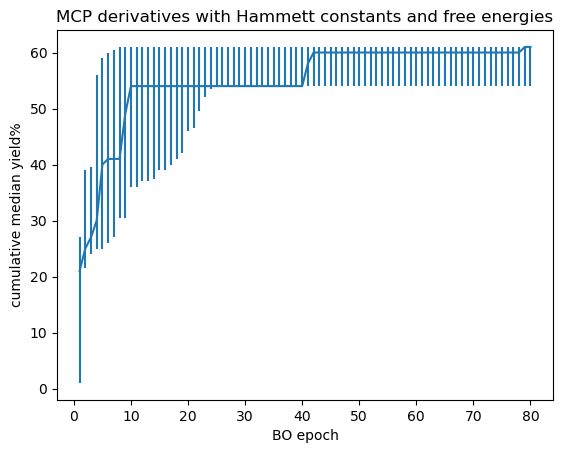

BO reaches maximum yield, 61, at epoch 78
The lengths of error bars are 
 [26.0, 17.5, 15.5, 31.0, 34.0, 34.0, 33.5, 30.5, 30.5, 25.0, 25.0, 24.0, 24.0, 23.5, 22.0, 22.0, 21.0, 20.0, 19.0, 15.0, 14.5, 11.5, 9.0, 7.5, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]


In [9]:
list_final5=pd.read_csv('raw_derivatives 40 x 80 with const and energies.csv').to_numpy().tolist()
plt.title("MCP derivatives with Hammett constants and free energies")
print('The lengths of error bars are \n',cumu_plotting_deri(list_final5).tolist())

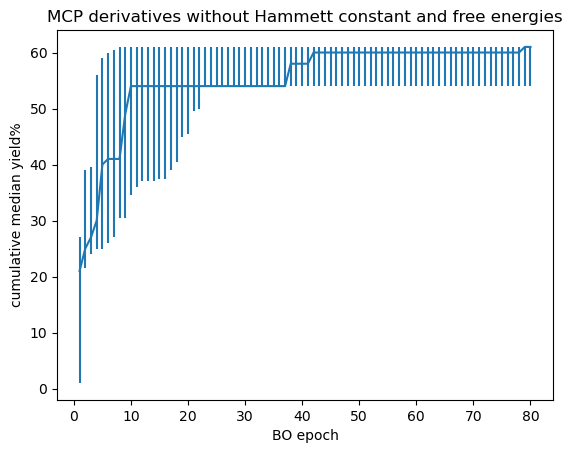

BO reaches maximum yield, 61, at epoch 78
The lengths of error bars are 
 [26.0, 17.5, 15.5, 31.0, 34.0, 34.0, 33.5, 30.5, 30.5, 26.5, 25.0, 24.0, 24.0, 24.0, 23.5, 23.5, 22.0, 20.5, 16.0, 15.5, 11.5, 11.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0]


In [10]:
list_final6=pd.read_csv('raw 40 x 80 derivatives without const and free energy.csv').to_numpy().tolist()
plt.title("MCP derivatives without Hammett constant and free energies")
print('The lengths of error bars are \n',cumu_plotting_deri(list_final6).tolist())